In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Acquire the Data

- Find and acquire the Boston Housing Data Set.
- The set has 506 instances and 14 variables.

In [13]:
housing_df = pd.read_csv('housing_data.csv',delim_whitespace=True, header=None)

In [14]:
type(housing_df)

pandas.core.frame.DataFrame

In [15]:
housing_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
housing_df.shape

(506, 14)

In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null int64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null int64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
13    506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [18]:
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [19]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
housing_df.drop(['MEDV'], axis=1, inplace=True)

In [21]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


### Develop a Sampling Technique

- Demonstrate a sample size and/or method that is sufficient to describe the dataset.
- Pull samples of different sizes.
- Compare these samples to the original data.
- Discuss how much data do you need to get a description of the dataset.

In [22]:
from scipy.stats import skew

In [23]:
skew(housing_df)

array([ 5.20765239,  2.21906306,  0.29414628,  3.39579929,  0.72714416,
        0.40241467, -0.59718559,  1.00877876,  1.00183349,  0.66796827,
       -0.79994453, -2.88179835,  0.90377074])

In [24]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
stats = housing_df.describe().T
stats['skew'] = skew(housing_df)
stats

,count,mean,std,min,25%,50%,75%,max,skew
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762,5.207652
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968


### Sampling the Dataset

In [26]:
from numpy.random import randn

In [27]:
np.random.seed(101)

In [28]:
sample = housing_df.sample(5)

In [29]:
sample

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
434,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666.0,20.2,100.63,15.17
458,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666.0,20.2,272.21,16.23
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252.0,18.3,395.63,4.32


In [30]:
sample.mean()

CRIM         4.355224
ZN          31.000000
INDUS        8.358000
CHAS         0.000000
NOX          0.546800
RM           6.825200
AGE         57.340000
DIS          4.423400
RAD         11.600000
TAX        412.200000
PTRATIO     18.360000
B          311.920000
LSTAT        8.804000
dtype: float64

In [31]:
(sample.mean() - stats['mean'])/stats['std']

CRIM       0.086229
ZN         0.841951
INDUS     -0.405049
CHAS      -0.272329
NOX       -0.068133
RM         0.769360
AGE       -0.399125
DIS        0.298406
RAD        0.235504
TAX        0.023513
PTRATIO   -0.044127
B         -0.490214
LSTAT     -0.539004
dtype: float64

#### Repeat Sampling

In [32]:
sample_means = []
for _ in range(10):
    sample_means.append(housing_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

CRIM      -0.104096
ZN        -0.016020
INDUS     -0.164478
CHAS      -0.114845
NOX       -0.142021
RM        -0.127373
AGE       -0.053675
DIS        0.053358
RAD       -0.171053
TAX       -0.204448
PTRATIO   -0.066299
B          0.112275
LSTAT     -0.156176
dtype: float64

In [33]:
sample_means = []
for _ in range(50):
    sample_means.append(housing_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

CRIM       0.018791
ZN        -0.057869
INDUS     -0.089876
CHAS      -0.051851
NOX       -0.061067
RM         0.017537
AGE       -0.042535
DIS        0.049251
RAD       -0.042425
TAX       -0.057039
PTRATIO   -0.002186
B          0.015142
LSTAT      0.008533
dtype: float64

In [34]:
sample_means = []
for _ in range(100):
    sample_means.append(housing_df.sample(5).mean())

sample_means = np.array(sample_means)
(sample_means.mean(axis=0)-stats['mean'])/stats['std']

CRIM       0.019714
ZN         0.102835
INDUS     -0.014681
CHAS      -0.043977
NOX       -0.028579
RM         0.027340
AGE       -0.051274
DIS        0.061265
RAD       -0.043574
TAX        0.008775
PTRATIO   -0.046067
B          0.039775
LSTAT     -0.053581
dtype: float64

In [35]:
sample_1 = housing_df.sample(50)
(sample_1.mean() - stats['mean'])/stats['std']

CRIM      -0.025891
ZN        -0.005730
INDUS      0.099998
CHAS       0.042639
NOX        0.234773
RM         0.032970
AGE        0.138659
DIS       -0.017610
RAD       -0.028644
TAX       -0.000102
PTRATIO   -0.270461
B         -0.258532
LSTAT      0.107258
dtype: float64

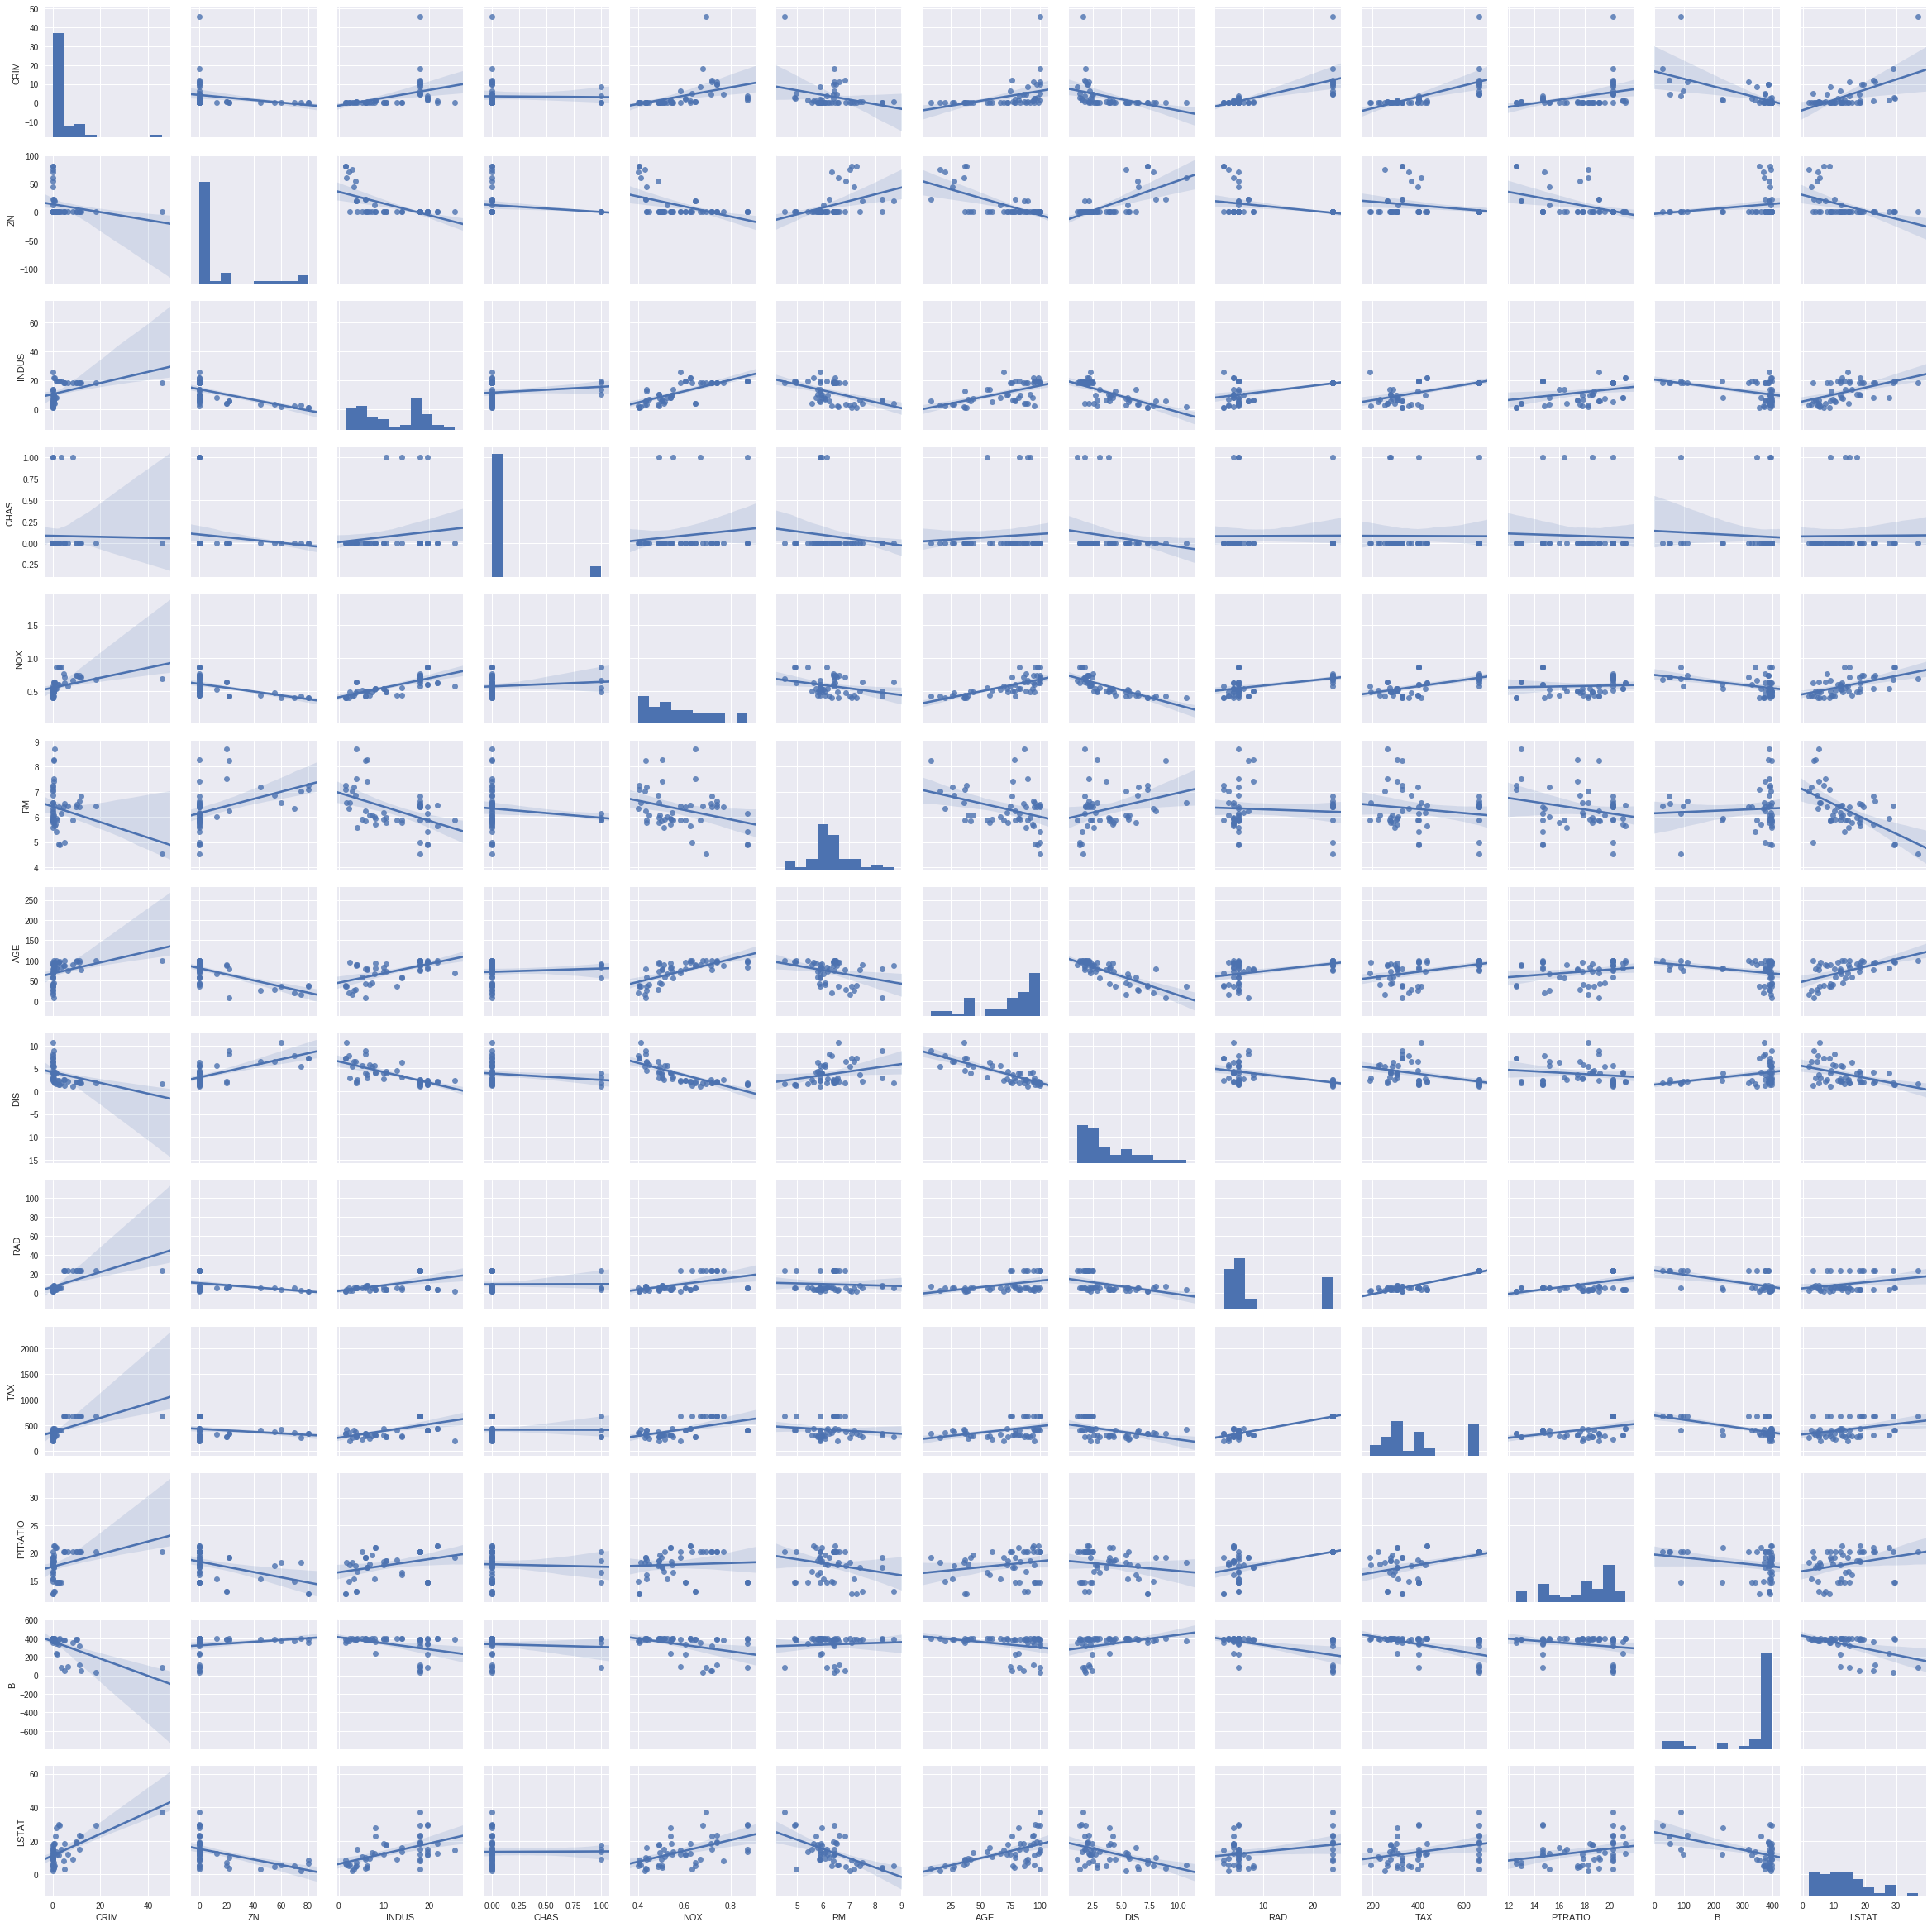

In [36]:
sns.pairplot(sample_1, kind='reg')